# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [120]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [3]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [5]:
std=1e-4
output_size=num_classes
W1=std * np.random.randn(input_size, hidden_size)
b1=np.zeros(hidden_size)
W2=std * np.random.randn(hidden_size, output_size)
b2=np.zeros(output_size)

In [6]:
np.clip([-1,2,3,10],0,4)

array([0, 2, 3, 4])

In [7]:
s=X.dot(W1)+b1
X1=np.clip(s,0,np.max(s))
X2=X1.dot(W2)+b2

In [8]:
np.maximum(s,np.zeros_like(s))

array([[0.00000000e+00, 2.94891674e-03, 3.50539110e-03, 8.14211389e-04,
        2.07124205e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [7.61911047e-05, 6.23185782e-04, 1.92784020e-03, 5.59907271e-03,
        2.57216826e-03, 0.00000000e+00, 2.15965448e-03, 1.60644973e-03,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.72032538e-03, 3.56533106e-03,
        9.59435103e-04, 0.00000000e+00, 0.00000000e+00, 7.95595037e-04,
        0.00000000e+00, 0.00000000e+00],
       [7.28418806e-05, 0.00000000e+00, 3.82763855e-04, 2.46568441e-03,
        2.54708766e-04, 0.00000000e+00, 0.00000000e+00, 1.56877384e-03,
        0.00000000e+00, 0.00000000e+00],
       [9.63803737e-04, 0.00000000e+00, 0.00000000e+00, 5.23169286e-04,
        3.14324138e-04, 4.44014642e-04, 1.49906159e-03, 5.86889349e-04,
        0.00000000e+00, 0.00000000e+00]])

In [9]:
X1

array([[0.00000000e+00, 2.94891674e-03, 3.50539110e-03, 8.14211389e-04,
        2.07124205e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [7.61911047e-05, 6.23185782e-04, 1.92784020e-03, 5.59907271e-03,
        2.57216826e-03, 0.00000000e+00, 2.15965448e-03, 1.60644973e-03,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.72032538e-03, 3.56533106e-03,
        9.59435103e-04, 0.00000000e+00, 0.00000000e+00, 7.95595037e-04,
        0.00000000e+00, 0.00000000e+00],
       [7.28418806e-05, 0.00000000e+00, 3.82763855e-04, 2.46568441e-03,
        2.54708766e-04, 0.00000000e+00, 0.00000000e+00, 1.56877384e-03,
        0.00000000e+00, 0.00000000e+00],
       [9.63803737e-04, 0.00000000e+00, 0.00000000e+00, 5.23169286e-04,
        3.14324138e-04, 4.44014642e-04, 1.49906159e-03, 5.86889349e-04,
        0.00000000e+00, 0.00000000e+00]])

In [10]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularization loss.

In [11]:
np.sum(W1**2)

2.695576891168454e-07

In [12]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7963408538435033e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [14]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 4.904672e-09
b2 max relative error: 4.652672e-11
W1 max relative error: 4.020826e-09
b1 max relative error: 8.372512e-10


In [15]:
grads

{'W2': array([[-5.13764691e-01,  1.67232930e-01,  3.04783350e-01],
        [ 1.95077540e-02, -5.09652182e-03, -4.38074302e-03],
        [ 2.92229174e-01,  1.18896894e-01, -4.32018096e-01],
        [-2.33121075e-01,  1.86288200e-01,  3.96198312e-02],
        [ 7.78174796e-01, -3.54233027e-01, -4.41137965e-01],
        [ 4.28331871e-03,  6.65172224e-04,  3.02471898e-03],
        [-6.34322094e-03, -3.62741166e-03, -6.72460448e-03],
        [ 6.17281609e-02, -1.29900489e-01,  3.91825079e-02],
        [ 6.32053946e-01, -8.44023525e-02, -5.66197124e-01],
        [ 8.89334995e-01, -6.04709349e-01, -2.88551353e-01]]),
 'b2': array([ 0.2099691, -0.1431905, -0.0667786]),
 'W1': array([[-9.68499043e-02,  4.00157208e-03, -2.05517828e-01,
          1.87986352e-01,  1.60531645e-01, -9.77277880e-03,
          9.50088418e-03,  2.68884345e-03, -3.01022811e-02,
         -5.67802801e-03],
        [ 4.45595008e-02,  1.45427351e-02,  6.95515502e-01,
         -2.88616327e-01, -2.66986989e-01,  3.33674327e-0

# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.02.

Final training loss:  0.017149607938731996


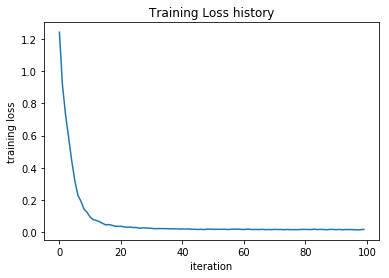

In [17]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

In [24]:
X

array([[ 16.24345364,  -6.11756414,  -5.28171752, -10.72968622],
       [  8.65407629, -23.01538697,  17.44811764,  -7.61206901],
       [  3.19039096,  -2.49370375,  14.62107937, -20.60140709],
       [ -3.22417204,  -3.84054355,  11.33769442, -10.99891267],
       [ -1.72428208,  -8.77858418,   0.42213747,   5.82815214]])

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [11]:
from cs231n.data_utils import load_CIFAR10
import numpy as np
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    print(mean_image.shape)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

(32, 32, 3)
Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


In [19]:
x=X_train.reshape(49000,32,32,3)

In [22]:
x.mean(axis=0).shape

(32, 32, 3)

In [30]:
(x[:,:,:,2]).mean()

6.391984447409228e-16

# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [110]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 2.302949
iteration 100 / 1000: loss 2.302243
iteration 200 / 1000: loss 2.296701
iteration 300 / 1000: loss 2.266096
iteration 400 / 1000: loss 2.170710
iteration 500 / 1000: loss 2.120141
iteration 600 / 1000: loss 2.076577
iteration 700 / 1000: loss 2.052784
iteration 800 / 1000: loss 2.009100
iteration 900 / 1000: loss 1.927642
Validation accuracy:  0.284


In [47]:
net.predict(X_val)

array([8, 0, 8, 6, 1, 6, 0, 0, 5, 5, 6, 9, 9, 0, 7, 5, 5, 6, 0, 6, 8, 9,
       5, 1, 0, 8, 9, 6, 0, 8, 6, 9, 5, 5, 5, 9, 8, 6, 6, 5, 9, 6, 9, 8,
       6, 9, 6, 0, 5, 6, 1, 5, 5, 0, 0, 6, 5, 9, 9, 1, 0, 6, 9, 9, 9, 9,
       9, 0, 5, 5, 6, 9, 9, 6, 7, 8, 6, 6, 5, 8, 6, 5, 9, 5, 8, 8, 8, 8,
       0, 5, 8, 0, 9, 0, 6, 6, 0, 6, 5, 6, 0, 0, 0, 6, 6, 6, 5, 0, 0, 6,
       6, 5, 9, 5, 5, 9, 5, 1, 7, 6, 5, 5, 9, 9, 8, 9, 0, 8, 8, 6, 8, 6,
       9, 8, 8, 6, 6, 8, 5, 7, 4, 6, 6, 9, 5, 5, 7, 6, 9, 0, 9, 0, 0, 0,
       0, 8, 6, 1, 8, 6, 8, 0, 9, 9, 8, 9, 8, 8, 8, 0, 9, 5, 6, 0, 0, 8,
       9, 8, 8, 5, 8, 9, 9, 9, 8, 0, 9, 6, 7, 0, 6, 8, 5, 8, 8, 0, 0, 0,
       5, 0, 6, 8, 8, 6, 1, 0, 9, 6, 9, 1, 5, 9, 6, 6, 1, 5, 5, 9, 0, 0,
       8, 9, 0, 1, 6, 9, 6, 6, 9, 5, 9, 4, 5, 5, 1, 8, 8, 5, 8, 8, 5, 5,
       5, 6, 6, 0, 8, 8, 4, 9, 8, 6, 6, 0, 9, 0, 6, 8, 9, 5, 6, 6, 9, 5,
       7, 9, 9, 5, 8, 1, 7, 5, 5, 0, 8, 5, 0, 6, 8, 8, 1, 9, 6, 6, 9, 6,
       0, 9, 5, 6, 6, 0, 6, 6, 5, 9, 9, 6, 5, 5, 6,

In [48]:
y_val

array([8, 9, 4, 9, 0, 5, 0, 8, 2, 3, 7, 8, 9, 4, 5, 3, 2, 5, 0, 7, 2, 1,
       1, 4, 4, 8, 9, 4, 6, 9, 4, 9, 3, 5, 6, 9, 9, 7, 7, 6, 1, 6, 8, 8,
       3, 1, 6, 7, 7, 2, 0, 7, 5, 2, 3, 4, 6, 9, 7, 6, 1, 6, 6, 7, 9, 9,
       1, 0, 2, 2, 5, 7, 9, 9, 9, 1, 6, 4, 3, 3, 1, 3, 6, 3, 1, 1, 9, 9,
       6, 3, 8, 0, 0, 2, 6, 6, 1, 4, 4, 2, 0, 2, 8, 7, 2, 5, 2, 0, 8, 7,
       6, 5, 9, 5, 4, 8, 7, 3, 5, 6, 5, 1, 1, 9, 9, 9, 7, 8, 0, 6, 0, 3,
       7, 7, 8, 6, 1, 1, 4, 7, 3, 7, 3, 3, 8, 6, 3, 9, 1, 0, 1, 1, 8, 2,
       4, 5, 2, 3, 9, 2, 8, 8, 7, 1, 0, 8, 8, 9, 0, 0, 3, 6, 5, 1, 0, 7,
       0, 8, 3, 2, 8, 9, 8, 7, 8, 5, 1, 4, 5, 0, 3, 8, 6, 9, 9, 8, 1, 3,
       7, 4, 6, 8, 7, 7, 4, 0, 9, 4, 9, 6, 6, 9, 6, 4, 6, 5, 8, 9, 3, 0,
       8, 1, 3, 3, 2, 1, 7, 3, 9, 7, 1, 7, 1, 3, 1, 8, 0, 4, 9, 1, 3, 7,
       5, 4, 9, 0, 7, 8, 2, 9, 8, 4, 4, 8, 5, 0, 2, 8, 8, 5, 9, 6, 7, 0,
       7, 6, 9, 5, 2, 1, 7, 5, 7, 3, 2, 2, 0, 7, 9, 6, 3, 7, 2, 1, 9, 6,
       1, 9, 5, 6, 2, 8, 4, 7, 5, 9, 6, 2, 3, 3, 9,

# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

Text(0,0.5,'Loss')

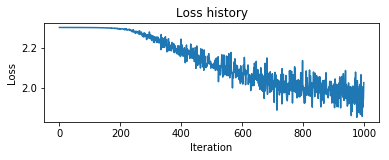

In [111]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

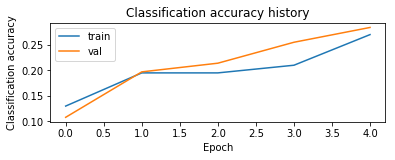

In [112]:
plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

In [137]:
visualize_grid??

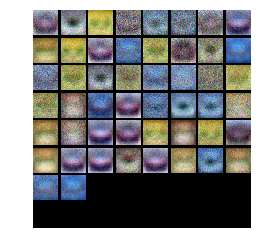

In [113]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$

In [57]:
from tqdm import tqdm_notebook

In [ ]:
netlr_1e4=net # 0.3331224489795918 0.335

In [63]:
netlr_5e4_005=net # 0.4843877551020408 0.46

In [66]:
netlr_7e4_005=net # 0.4980816326530612 0.481

In [70]:
netlr_8e4_005=net # 0.5133469387755102 0.482

In [ ]:
# 0.21306122448979592 0.235, 1e-5,0.05 doesn't work well 

In [ ]:
netlr_8e4_015=net # 0.5107755102040816 0.504 

In [ ]:
1e-4 - 8e-4, 0.02 - 

In [80]:
lr=7e-4
reg=0.05
net=TwoLayerNet(input_size,hidden_size,num_classes)
net.train(X_train,y_train,X_val,y_val,lr,0.95,reg,1500)
y_train_preds=net.predict(X_train)
y_valid_preds=net.predict(X_val)
train_acc=np.mean(y_train_preds==y_train)
valid_acc=np.mean(y_valid_preds==y_val)

print(train_acc,valid_acc)

0.4966734693877551 0.463


In [68]:
print(train_acc,valid_acc)

0.5133469387755102 0.482


In [83]:
reg_parameters

array([0.1       , 0.14444444, 0.18888889, 0.23333333, 0.27777778,
       0.32222222, 0.36666667, 0.41111111, 0.45555556, 0.5       ])

In [84]:
learning_rates

array([0.0001    , 0.00018889, 0.00027778, 0.00036667, 0.00045556,
       0.00054444, 0.00063333, 0.00072222, 0.00081111, 0.0009    ])

In [85]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
learning_rates=np.linspace(1e-4,9e-4,10)
reg_parameters=np.linspace(0.1, 0.5,10)

best_acc=-1

for lr in tqdm_notebook(learning_rates):
    for reg in tqdm_notebook(reg_parameters):
        net=TwoLayerNet(input_size,hidden_size,num_classes)
        net.train(X_train,y_train,X_val,y_val,lr,0.95,reg,1500)
        y_train_preds=net.predict(X_train)
        y_valid_preds=net.predict(X_val)
        train_acc=np.mean(y_train_preds==y_train)
        valid_acc=np.mean(y_valid_preds==y_val)
        
        if valid_acc>best_acc:
            best_acc=valid_acc
            best_net=net
        
        print("lr",lr,"reg",reg,"train_acc",train_acc,"valid_acc",valid_acc)

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


lr 0.0001 reg 0.1 train_acc 0.3366734693877551 valid_acc 0.337
lr 0.0001 reg 0.14444444444444446 train_acc 0.331 valid_acc 0.333
lr 0.0001 reg 0.18888888888888888 train_acc 0.33483673469387754 valid_acc 0.336
lr 0.0001 reg 0.23333333333333334 train_acc 0.3326938775510204 valid_acc 0.335
lr 0.0001 reg 0.2777777777777778 train_acc 0.33224489795918366 valid_acc 0.328
lr 0.0001 reg 0.32222222222222224 train_acc 0.33057142857142857 valid_acc 0.331
lr 0.0001 reg 0.3666666666666667 train_acc 0.33110204081632655 valid_acc 0.33
lr 0.0001 reg 0.4111111111111111 train_acc 0.3303877551020408 valid_acc 0.325
lr 0.0001 reg 0.4555555555555556 train_acc 0.3286734693877551 valid_acc 0.329
lr 0.0001 reg 0.5 train_acc 0.32740816326530614 valid_acc 0.325


lr 0.00018888888888888888 reg 0.1 train_acc 0.39577551020408164 valid_acc 0.393
lr 0.00018888888888888888 reg 0.14444444444444446 train_acc 0.39548979591836736 valid_acc 0.391
lr 0.00018888888888888888 reg 0.18888888888888888 train_acc 0.3960408163265306 valid_acc 0.393
lr 0.00018888888888888888 reg 0.23333333333333334 train_acc 0.3971224489795918 valid_acc 0.388
lr 0.00018888888888888888 reg 0.2777777777777778 train_acc 0.38985714285714285 valid_acc 0.391
lr 0.00018888888888888888 reg 0.32222222222222224 train_acc 0.39040816326530614 valid_acc 0.389
lr 0.00018888888888888888 reg 0.3666666666666667 train_acc 0.38893877551020406 valid_acc 0.393
lr 0.00018888888888888888 reg 0.4111111111111111 train_acc 0.39202040816326533 valid_acc 0.396
lr 0.00018888888888888888 reg 0.4555555555555556 train_acc 0.39348979591836736 valid_acc 0.402
lr 0.00018888888888888888 reg 0.5 train_acc 0.39224489795918366 valid_acc 0.383


lr 0.0002777777777777778 reg 0.1 train_acc 0.4334081632653061 valid_acc 0.442
lr 0.0002777777777777778 reg 0.14444444444444446 train_acc 0.43487755102040815 valid_acc 0.445
lr 0.0002777777777777778 reg 0.18888888888888888 train_acc 0.43112244897959184 valid_acc 0.436
lr 0.0002777777777777778 reg 0.23333333333333334 train_acc 0.4290408163265306 valid_acc 0.429
lr 0.0002777777777777778 reg 0.2777777777777778 train_acc 0.4306734693877551 valid_acc 0.425
lr 0.0002777777777777778 reg 0.32222222222222224 train_acc 0.43251020408163265 valid_acc 0.439
lr 0.0002777777777777778 reg 0.3666666666666667 train_acc 0.4286938775510204 valid_acc 0.429
lr 0.0002777777777777778 reg 0.4111111111111111 train_acc 0.4299795918367347 valid_acc 0.436
lr 0.0002777777777777778 reg 0.4555555555555556 train_acc 0.4323061224489796 valid_acc 0.433
lr 0.0002777777777777778 reg 0.5 train_acc 0.4281632653061225 valid_acc 0.438


lr 0.0003666666666666666 reg 0.1 train_acc 0.4550612244897959 valid_acc 0.448
lr 0.0003666666666666666 reg 0.14444444444444446 train_acc 0.45716326530612245 valid_acc 0.461
lr 0.0003666666666666666 reg 0.18888888888888888 train_acc 0.456734693877551 valid_acc 0.456
lr 0.0003666666666666666 reg 0.23333333333333334 train_acc 0.45953061224489794 valid_acc 0.447
lr 0.0003666666666666666 reg 0.2777777777777778 train_acc 0.4545102040816327 valid_acc 0.452
lr 0.0003666666666666666 reg 0.32222222222222224 train_acc 0.4538979591836735 valid_acc 0.454
lr 0.0003666666666666666 reg 0.3666666666666667 train_acc 0.4529795918367347 valid_acc 0.464
lr 0.0003666666666666666 reg 0.4111111111111111 train_acc 0.4503877551020408 valid_acc 0.448
lr 0.0003666666666666666 reg 0.4555555555555556 train_acc 0.4484489795918367 valid_acc 0.458
lr 0.0003666666666666666 reg 0.5 train_acc 0.45010204081632654 valid_acc 0.446


lr 0.0004555555555555555 reg 0.1 train_acc 0.472 valid_acc 0.464
lr 0.0004555555555555555 reg 0.14444444444444446 train_acc 0.4725714285714286 valid_acc 0.47
lr 0.0004555555555555555 reg 0.18888888888888888 train_acc 0.47144897959183674 valid_acc 0.455
lr 0.0004555555555555555 reg 0.23333333333333334 train_acc 0.47508163265306125 valid_acc 0.466
lr 0.0004555555555555555 reg 0.2777777777777778 train_acc 0.469 valid_acc 0.463
lr 0.0004555555555555555 reg 0.32222222222222224 train_acc 0.46746938775510205 valid_acc 0.457
lr 0.0004555555555555555 reg 0.3666666666666667 train_acc 0.468734693877551 valid_acc 0.452
lr 0.0004555555555555555 reg 0.4111111111111111 train_acc 0.46969387755102043 valid_acc 0.458
lr 0.0004555555555555555 reg 0.4555555555555556 train_acc 0.46822448979591835 valid_acc 0.46
lr 0.0004555555555555555 reg 0.5 train_acc 0.4619591836734694 valid_acc 0.461


lr 0.0005444444444444444 reg 0.1 train_acc 0.48873469387755103 valid_acc 0.468
lr 0.0005444444444444444 reg 0.14444444444444446 train_acc 0.4869183673469388 valid_acc 0.468
lr 0.0005444444444444444 reg 0.18888888888888888 train_acc 0.48006122448979593 valid_acc 0.466
lr 0.0005444444444444444 reg 0.23333333333333334 train_acc 0.47936734693877553 valid_acc 0.469
lr 0.0005444444444444444 reg 0.2777777777777778 train_acc 0.4817959183673469 valid_acc 0.474
lr 0.0005444444444444444 reg 0.32222222222222224 train_acc 0.48059183673469386 valid_acc 0.462
lr 0.0005444444444444444 reg 0.3666666666666667 train_acc 0.4785510204081633 valid_acc 0.463
lr 0.0005444444444444444 reg 0.4111111111111111 train_acc 0.47416326530612246 valid_acc 0.471
lr 0.0005444444444444444 reg 0.4555555555555556 train_acc 0.47581632653061223 valid_acc 0.453
lr 0.0005444444444444444 reg 0.5 train_acc 0.47444897959183674 valid_acc 0.465


lr 0.0006333333333333333 reg 0.1 train_acc 0.49551020408163265 valid_acc 0.458
lr 0.0006333333333333333 reg 0.14444444444444446 train_acc 0.49795918367346936 valid_acc 0.472
lr 0.0006333333333333333 reg 0.18888888888888888 train_acc 0.4893673469387755 valid_acc 0.462
lr 0.0006333333333333333 reg 0.23333333333333334 train_acc 0.4872448979591837 valid_acc 0.47
lr 0.0006333333333333333 reg 0.2777777777777778 train_acc 0.4917755102040816 valid_acc 0.489
lr 0.0006333333333333333 reg 0.32222222222222224 train_acc 0.4899183673469388 valid_acc 0.469
lr 0.0006333333333333333 reg 0.3666666666666667 train_acc 0.4869591836734694 valid_acc 0.461
lr 0.0006333333333333333 reg 0.4111111111111111 train_acc 0.4890408163265306 valid_acc 0.471
lr 0.0006333333333333333 reg 0.4555555555555556 train_acc 0.48222448979591837 valid_acc 0.472
lr 0.0006333333333333333 reg 0.5 train_acc 0.4842448979591837 valid_acc 0.455


lr 0.0007222222222222222 reg 0.1 train_acc 0.5044081632653061 valid_acc 0.478
lr 0.0007222222222222222 reg 0.14444444444444446 train_acc 0.5010408163265306 valid_acc 0.471
lr 0.0007222222222222222 reg 0.18888888888888888 train_acc 0.49626530612244896 valid_acc 0.492
lr 0.0007222222222222222 reg 0.23333333333333334 train_acc 0.4983265306122449 valid_acc 0.47
lr 0.0007222222222222222 reg 0.2777777777777778 train_acc 0.4977755102040816 valid_acc 0.477
lr 0.0007222222222222222 reg 0.32222222222222224 train_acc 0.4982448979591837 valid_acc 0.475
lr 0.0007222222222222222 reg 0.3666666666666667 train_acc 0.4952244897959184 valid_acc 0.476
lr 0.0007222222222222222 reg 0.4111111111111111 train_acc 0.49448979591836734 valid_acc 0.481
lr 0.0007222222222222222 reg 0.4555555555555556 train_acc 0.4927142857142857 valid_acc 0.465
lr 0.0007222222222222222 reg 0.5 train_acc 0.4913877551020408 valid_acc 0.475


lr 0.0008111111111111111 reg 0.1 train_acc 0.5097755102040816 valid_acc 0.476
lr 0.0008111111111111111 reg 0.14444444444444446 train_acc 0.5048979591836734 valid_acc 0.489
lr 0.0008111111111111111 reg 0.18888888888888888 train_acc 0.5026326530612245 valid_acc 0.478
lr 0.0008111111111111111 reg 0.23333333333333334 train_acc 0.5031224489795918 valid_acc 0.484
lr 0.0008111111111111111 reg 0.2777777777777778 train_acc 0.49920408163265306 valid_acc 0.479
lr 0.0008111111111111111 reg 0.32222222222222224 train_acc 0.49859183673469387 valid_acc 0.472
lr 0.0008111111111111111 reg 0.3666666666666667 train_acc 0.49848979591836734 valid_acc 0.485
lr 0.0008111111111111111 reg 0.4111111111111111 train_acc 0.49842857142857144 valid_acc 0.485
lr 0.0008111111111111111 reg 0.4555555555555556 train_acc 0.4909387755102041 valid_acc 0.458
lr 0.0008111111111111111 reg 0.5 train_acc 0.4923469387755102 valid_acc 0.484


lr 0.0009 reg 0.1 train_acc 0.509795918367347 valid_acc 0.496
lr 0.0009 reg 0.14444444444444446 train_acc 0.509795918367347 valid_acc 0.478
lr 0.0009 reg 0.18888888888888888 train_acc 0.5055918367346939 valid_acc 0.49
lr 0.0009 reg 0.23333333333333334 train_acc 0.5098775510204082 valid_acc 0.481
lr 0.0009 reg 0.2777777777777778 train_acc 0.5079183673469387 valid_acc 0.479
lr 0.0009 reg 0.32222222222222224 train_acc 0.5064489795918368 valid_acc 0.482
lr 0.0009 reg 0.3666666666666667 train_acc 0.4966326530612245 valid_acc 0.467
lr 0.0009 reg 0.4111111111111111 train_acc 0.5027142857142857 valid_acc 0.471
lr 0.0009 reg 0.4555555555555556 train_acc 0.49075510204081635 valid_acc 0.467
lr 0.0009 reg 0.5 train_acc 0.4969795918367347 valid_acc 0.464



In [87]:
valid_acc

0.464

In [95]:
import pandas as pd

best_net.params["W1"]

array([[-0.00127065, -0.00099034, -0.00181105, ...,  0.00036491,
        -0.00133306,  0.0012023 ],
       [ 0.00097038, -0.00100694, -0.00223622, ...,  0.00041369,
        -0.00220775, -0.00138142],
       [ 0.00228419, -0.00088704, -0.00037703, ...,  0.00082691,
        -0.00190038, -0.00238864],
       ...,
       [ 0.00189811, -0.00012485, -0.00192032, ...,  0.00080976,
         0.00010915,  0.0003868 ],
       [ 0.00073094,  0.00078365, -0.00172798, ...,  0.00022348,
         0.00027603, -0.00182568],
       [-0.0012196 ,  0.00088407, -0.00018135, ...,  0.00034358,
        -0.00103222,  0.00122708]])

In [104]:
best_net.params["W1"].shape,best_net.params["W2"].shape

((3072, 50), (50, 10))

In [106]:
del show_net_weights

In [96]:
show_net_weights??

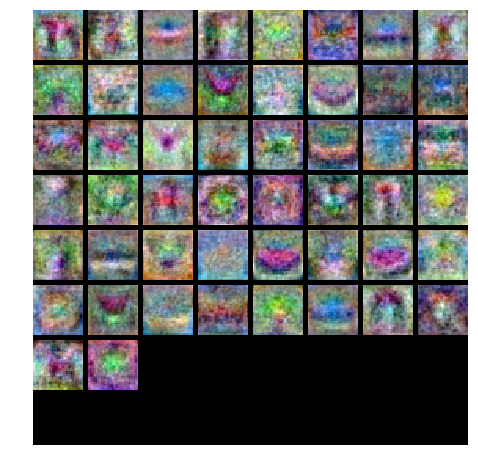

In [121]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [88]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.485


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$ 1,3

$\color{blue}{\textit Your Explanation:}$ This is due to overfitting. So we can reduce overfitting by increasing the dataset and regularization strength.

